# Colors
Chart of the average color of newly registered vehicles each year.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
plt.rcParams['figure.figsize'] = (10, 6)
pd.options.display.max_columns = 50
pd.options.display.max_rows = 20

register_data_path = '../../../vehicle_register/data/'


## Load data

In [5]:
register_cols = [
    'FirstRegistrationCZ',
    'Color',
]

register_dtypes = {
    'FirstRegistrationCZ': 'category',
    'Color': 'category',
}

df_register = pd.read_csv(
    f'{register_data_path}nosync/registr_silnicnich_vozidel_2023-02-24.analysis-cleaned-2023-06-13.csv',
    usecols=register_cols,
    dtype=register_dtypes,
    true_values=['True'],
    false_values=['False'],
    encoding_errors='ignore')

df_register['FirstRegistrationCZ'] = df_register['FirstRegistrationCZ'].apply(lambda x: int(x.split('-')[0]))

df_register.head()

,FirstRegistrationCZ,Color
0,1988.0,BÍLÁ
1,1987.0,BÍLÁ
2,1988.0,ŠEDÁ
3,1987.0,BÍLÁ
4,1988.0,BÍLÁ


In [6]:
df_register = df_register.dropna(subset=['Color'])

In [7]:
colors = df_register['Color'].cat.categories
colors = list(colors)
colors

['BÍLÁ',
 'FIALOVÁ',
 'HNĚDÁ',
 'MODRÁ',
 'ORANŽOVÁ',
 'ZELENÁ',
 'ČERNÁ',
 'ČERVENÁ',
 'ŠEDÁ',
 'ŽLUTÁ']

## Preprocess

In [8]:
groups = df_register.groupby(['Color'])['FirstRegistrationCZ'].value_counts()
groups

Color  FirstRegistrationCZ
BÍLÁ   2017.0                 109831
       2018.0                 108894
       2019.0                 105849
       2016.0                 105390
       2015.0                  92828
                               ...  
ŽLUTÁ  1949.0                      0
       1950.0                      0
       1951.0                      0
       1952.0                      0
       1953.0                      0
Name: count, Length: 900, dtype: int64

In [9]:
groups.index

MultiIndex([( 'BÍLÁ', 2017.0),
            ( 'BÍLÁ', 2018.0),
            ( 'BÍLÁ', 2019.0),
            ( 'BÍLÁ', 2016.0),
            ( 'BÍLÁ', 2015.0),
            ( 'BÍLÁ', 2021.0),
            ( 'BÍLÁ', 2022.0),
            ( 'BÍLÁ', 2020.0),
            ( 'BÍLÁ', 2014.0),
            ( 'BÍLÁ', 2013.0),
            ...
            ('ŽLUTÁ', 1943.0),
            ('ŽLUTÁ', 1944.0),
            ('ŽLUTÁ', 1945.0),
            ('ŽLUTÁ', 1946.0),
            ('ŽLUTÁ', 1947.0),
            ('ŽLUTÁ', 1949.0),
            ('ŽLUTÁ', 1950.0),
            ('ŽLUTÁ', 1951.0),
            ('ŽLUTÁ', 1952.0),
            ('ŽLUTÁ', 1953.0)],
           names=['Color', 'FirstRegistrationCZ'], length=900)

In [10]:
groupsx = pd.DataFrame({'Count': groups}, index=groups.index)
groupsx.sort_values(by=['Color', 'FirstRegistrationCZ'])

Count
Color FirstRegistrationCZ       
BÍLÁ  1901.0                   4
      1922.0                   0
      1931.0                   0
      1932.0                   0
      1933.0                   0
...                          ...
ŽLUTÁ 2019.0                6589
      2020.0                4930
      2021.0                5776
      2022.0                5231
      2023.0                 771

[900 rows x 1 columns]

In [11]:
# years_min = groupsx['FirstRegistrationCZ'].min()
# years_max = groupsx['FirstRegistrationCZ'].max()
years = [i for i in range(1900, 2023 + 1)]

In [12]:
# Fill missing zeroes.
for year in years:
    for color in colors:
        if (color, year) not in groupsx.index:
            groupsx.loc[(color, year), 'Count'] = 0

groupsx_o = groupsx
groupsx = groupsx.reset_index()

In [13]:
groupsx

,Color,FirstRegistrationCZ,Count
0,BÍLÁ,2017.0,109831.0
1,BÍLÁ,2018.0,108894.0
2,BÍLÁ,2019.0,105849.0
3,BÍLÁ,2016.0,105390.0
4,BÍLÁ,2015.0,92828.0
...,...,...,...
1235,ZELENÁ,1956.0,0.0
1236,ČERNÁ,1956.0,0.0
1237,ČERVENÁ,1956.0,0.0
1238,ŠEDÁ,1956.0,0.0


In [14]:
groupsx.sort_values(['FirstRegistrationCZ'])
# 1697 ????

,Color,FirstRegistrationCZ,Count
900,BÍLÁ,1900.0,0.0
901,FIALOVÁ,1900.0,0.0
902,HNĚDÁ,1900.0,0.0
903,MODRÁ,1900.0,0.0
904,ORANŽOVÁ,1900.0,0.0
...,...,...,...
839,ŽLUTÁ,2023.0,771.0
129,FIALOVÁ,2023.0,91.0
29,BÍLÁ,2023.0,13742.0
561,ČERNÁ,2023.0,8398.0


In [15]:
groupsx = groupsx[groupsx['FirstRegistrationCZ'] >= 1900].sort_values('FirstRegistrationCZ')
groupsx

,Color,FirstRegistrationCZ,Count
900,BÍLÁ,1900.0,0.0
901,FIALOVÁ,1900.0,0.0
902,HNĚDÁ,1900.0,0.0
903,MODRÁ,1900.0,0.0
904,ORANŽOVÁ,1900.0,0.0
...,...,...,...
839,ŽLUTÁ,2023.0,771.0
129,FIALOVÁ,2023.0,91.0
29,BÍLÁ,2023.0,13742.0
561,ČERNÁ,2023.0,8398.0


In [16]:
groupsx[groupsx['Color'] == 'BÍLÁ']

,Color,FirstRegistrationCZ,Count
900,BÍLÁ,1900.0,0.0
60,BÍLÁ,1901.0,4.0
910,BÍLÁ,1902.0,0.0
920,BÍLÁ,1903.0,0.0
930,BÍLÁ,1904.0,0.0
...,...,...,...
2,BÍLÁ,2019.0,105849.0
7,BÍLÁ,2020.0,83552.0
5,BÍLÁ,2021.0,90515.0
6,BÍLÁ,2022.0,85780.0


## Visualize

In [17]:
color_map = [
    'white',
    'purple',
    'brown',
    'blue',
    'orange',
    'green',
    'black',
    'red',
    'grey',
    'yellow'
]

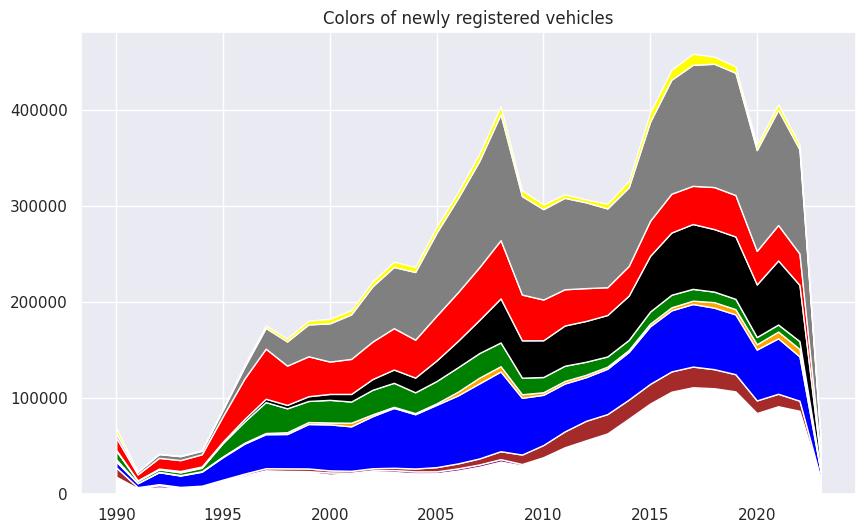

In [18]:
group_values = [groupsx[(groupsx['Color'] == color) & (groupsx['FirstRegistrationCZ'] >= 1990)]['Count'] for color in colors]


plt.stackplot([i for i in range(1990, 2024)], group_values, colors=color_map)
plt.title('Colors of newly registered vehicles')
plt.show()

In [19]:
# Standardize to sum of counts in each year = 1.

for year in years:
    total = groupsx[groupsx['FirstRegistrationCZ'] == year]['Count'].sum()
    for color in colors:
        groupsx.loc[(groupsx['FirstRegistrationCZ'] == year) & (groupsx['Color'] == color), 'Count'] = groupsx[(groupsx['FirstRegistrationCZ'] == year) & (groupsx['Color'] == color)]['Count'] / total
    
groupsx


,Color,FirstRegistrationCZ,Count
900,BÍLÁ,1900.0,NaN
901,FIALOVÁ,1900.0,NaN
902,HNĚDÁ,1900.0,NaN
903,MODRÁ,1900.0,NaN
904,ORANŽOVÁ,1900.0,NaN
...,...,...,...
839,ŽLUTÁ,2023.0,0.014075
129,FIALOVÁ,2023.0,0.001661
29,BÍLÁ,2023.0,0.250867
561,ČERNÁ,2023.0,0.153310


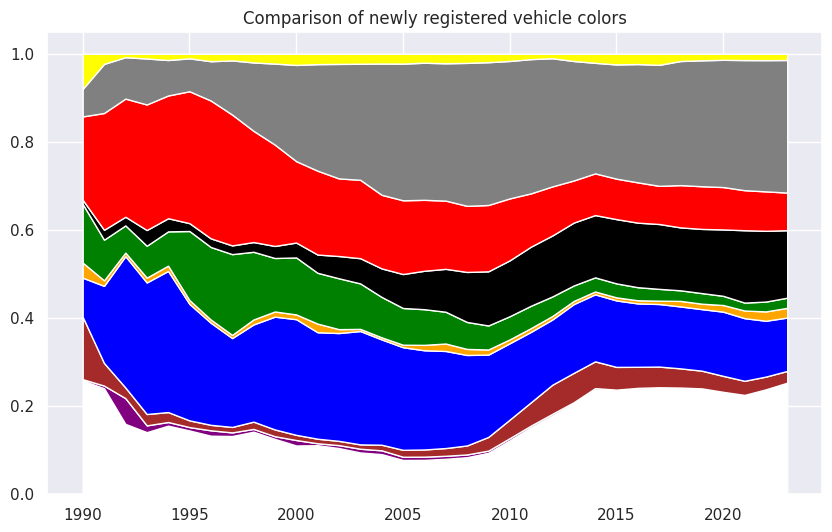

In [21]:
group_values = [groupsx[(groupsx['Color'] == color) & (groupsx['FirstRegistrationCZ'] >= 1990)]['Count'] for color in colors]


plt.stackplot([i for i in range(1990, 2024)], group_values, colors=color_map)
plt.title('Comparison of newly registered vehicle colors')
plt.show()

Verify a reasonable total count of vehicles is present each year.

In [22]:
df_register.groupby(['FirstRegistrationCZ']).size().tail(20)

FirstRegistrationCZ
2004.0    236079
2005.0    277971
2006.0    314005
2007.0    353941
2008.0    403420
2009.0    315923
2010.0    301205
2011.0    311784
2012.0    306460
2013.0    301956
2014.0    325634
2015.0    396747
2016.0    441281
2017.0    457981
2018.0    455082
2019.0    444899
2020.0    362737
2021.0    405452
2022.0    363758
2023.0     54778
dtype: int64